EDA

In [30]:
#library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_org = pd.read_csv('./power_tetouan_city_original.csv')
print(df_org.info())
print(df_org.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083            

In [32]:
print(df_org.describe())
print('NULL VALLUES:')
print(df_org.isnull().sum())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000     

In [33]:
#let set datetime to datetime type and as index:
df_org['DateTime'] = pd.to_datetime(df_org['DateTime'])
df_org = df_org.set_index('DateTime')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general diffuse flows      52416 non-null  float64
 4   diffuse flows              52416 non-null  float64
 5   Zone 1 Power Consumption   52416 non-null  float64
 6   Zone 2  Power Consumption  52416 non-null  float64
 7   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [34]:
df_org.head(5)

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                                   
2017-01-01 00:00:00                16128.87538                20240.96386  
2017-01-01 00:10:00                19375.07599                20131.08434  
2017-01-01 00:20:00                19006.68693                19668.43373  
2017-01-01 00:30:00                18361.09422                18899.27711  
2017-01-01 00:40:00                17872.34043                18442.40964

In [35]:
print(df_org.describe())
print(df_org.isnull().sum())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000     

There seems to be no nulls, or weird outliers, now lets visualize the consumpiton, before lets clean the column names

In [36]:
print(df_org.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


In [37]:
df = df_org.copy()

In [ ]:
#cleaning column names
df.rename(columns={
    'Temperature': 'temp',
    'Humidity':'hum',
    'Wind Speed':'wind',
    'general diffuse flows':'gen_diffuse_flows',
    'diffuse flows':'diffuse_flows',
    'Zone 1 Power Consumption':'z1_power_cons',
    'Zone 2  Power Consumption':'z2_power_cons',
    'Zone 3  Power Consumption':'z3_power_cons',
}, inplace=True)

In [39]:
print(df.columns)

Index(['temp', 'hum', 'wind', 'gen_diffuse_flows', 'diffuse_flows',
       'z1_power_cons', 'z2_power_cons', 'z3_power_cons'],
      dtype='object')


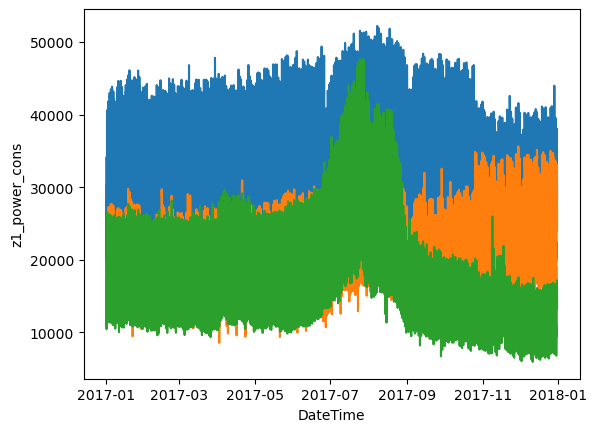

In [40]:
for zone in ['z1_power_cons','z2_power_cons','z3_power_cons']:
    sns.lineplot(x=df.index, 
                y=zone,
                data=df)

We can see a spike for all zones around month 8, which is summer, so should be because of higher temperatures. Lets look at the behaviour of consumption per zone

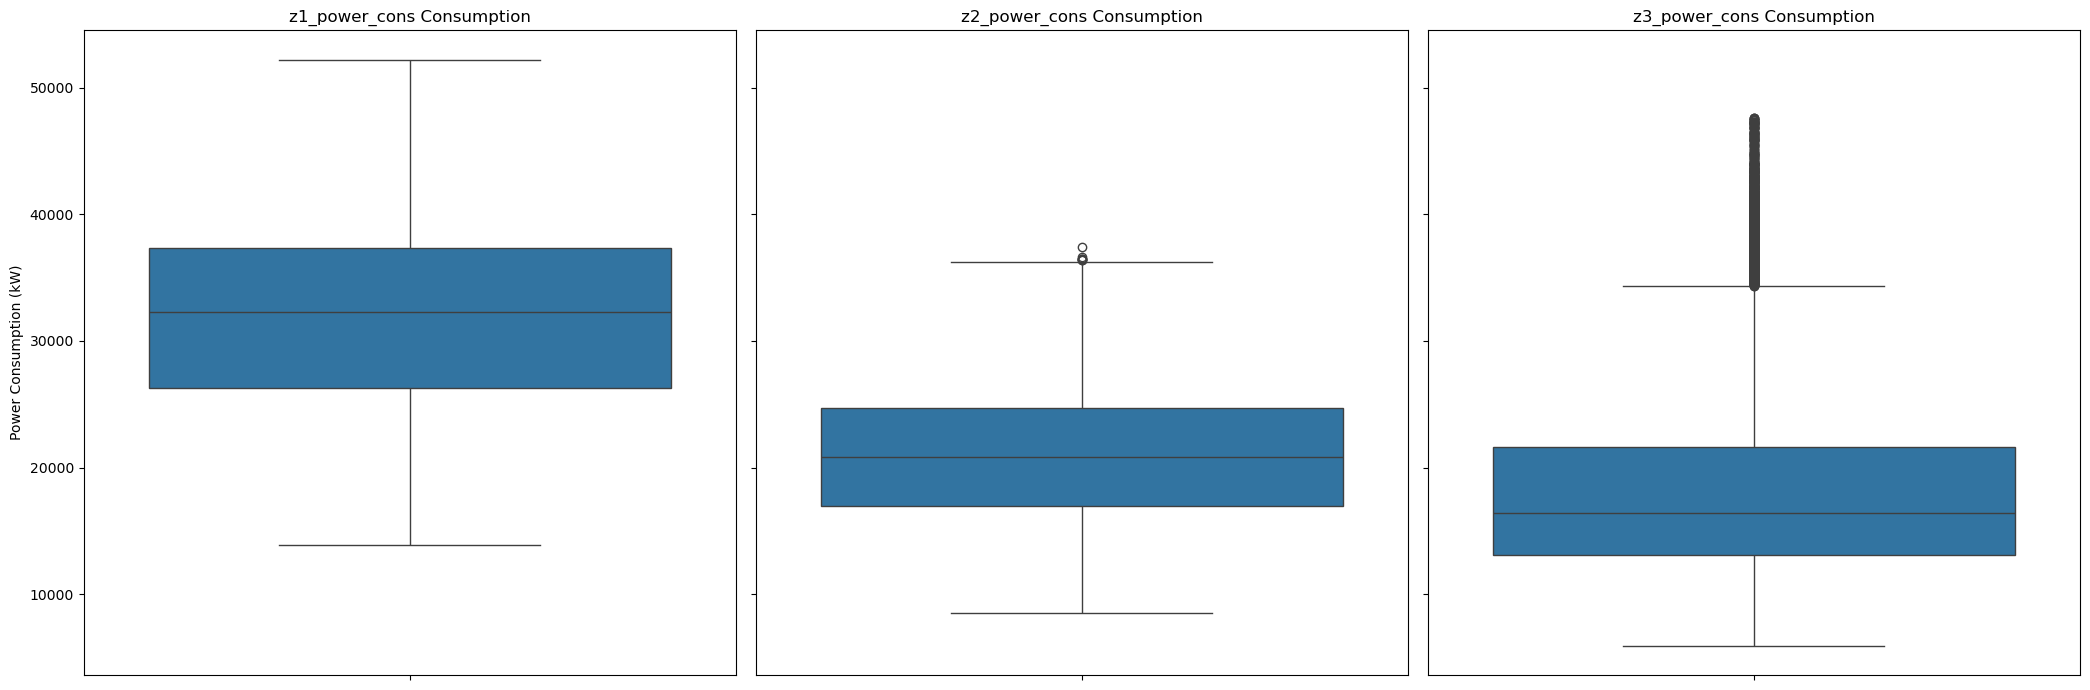

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot( y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

We can see an stable behaviour in the boxplots, and only in zone 3 we have some outliers that could be explain from the previous graph on the peak around august. And in general we can see again how zone 1 consumes more, then zone 2 and at last is zone 3 with its outliers, now lets visualize its distributions

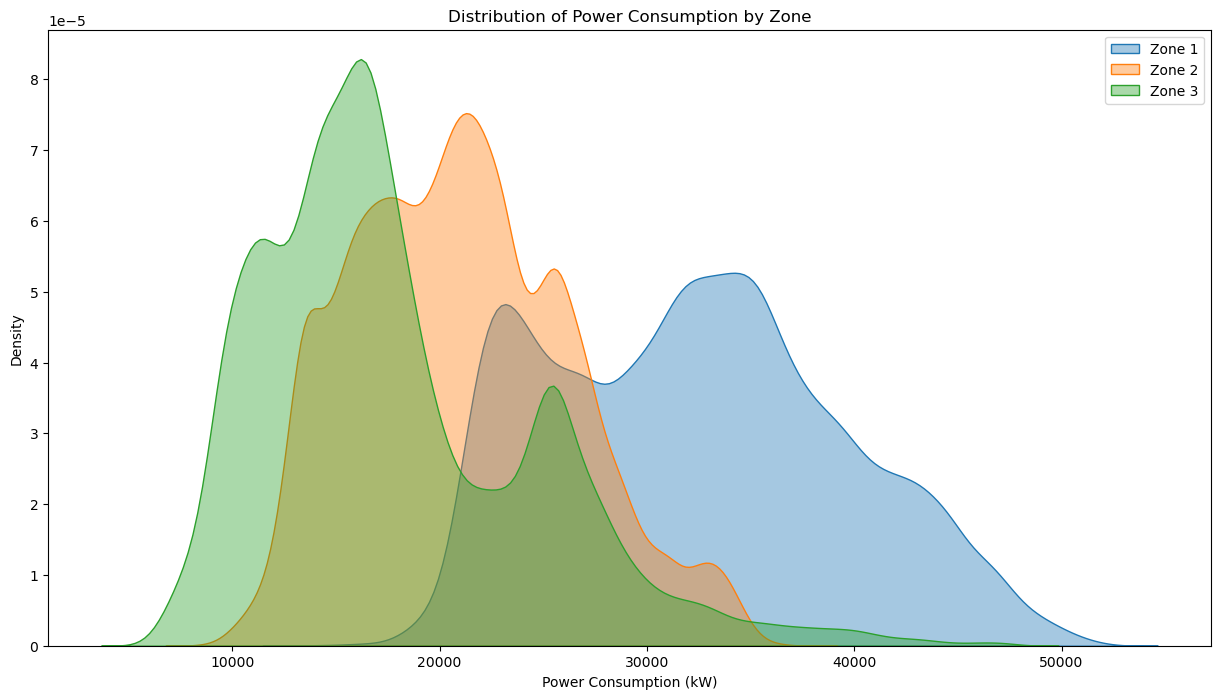

In [66]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['z1_power_cons'], label='Zone 1', fill=True, alpha=0.4)
sns.kdeplot(df['z2_power_cons'], label='Zone 2', fill=True, alpha=0.4)
sns.kdeplot(df['z3_power_cons'], label='Zone 3', fill=True, alpha=0.4)

plt.title("Distribution of Power Consumption by Zone")
plt.xlabel("Power Consumption (kW)")
plt.ylabel("Density")
plt.legend()
plt.show()

We can see that zone 3 and 2 have very similar distributions slightly skewed to the left, while zone 1 distribution seems to be a bit more centered, now lets see at the correlations with the features

<Axes: >

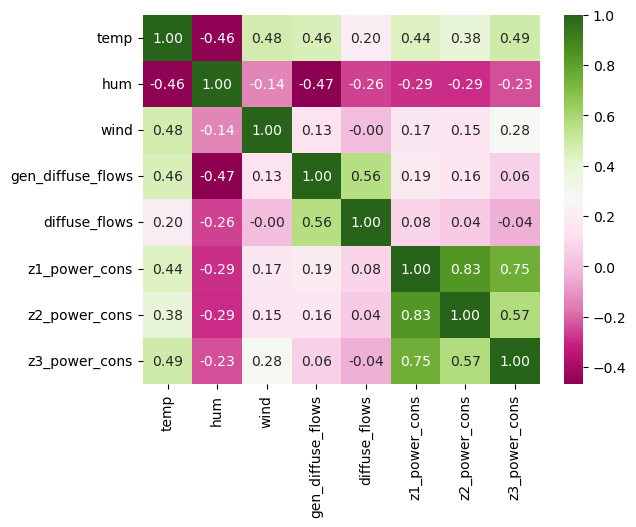

In [41]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG", cbar=True)

Now lets ee correlation specific per zone

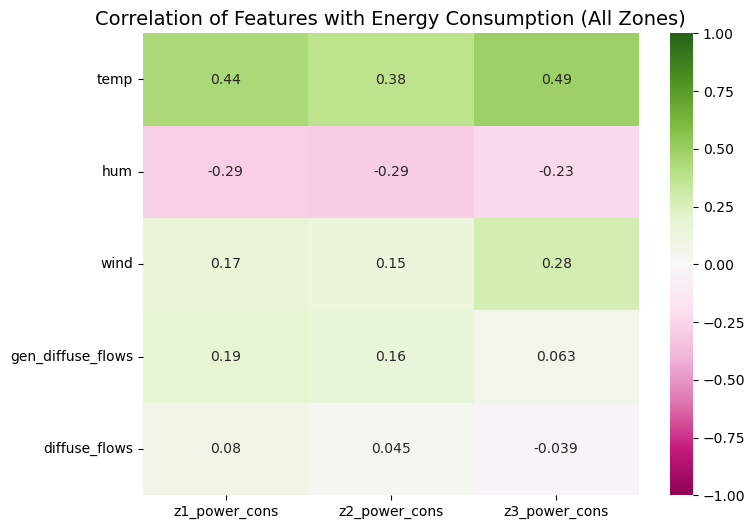

In [42]:
# Filter per zone

corr = df.corr()

features = ['temp', 'hum', 'wind', 'gen_diffuse_flows', 'diffuse_flows']
zone_corr = corr.loc[features, ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']]

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zone_corr, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Correlation of Features with Energy Consumption (All Zones)", fontsize=14)
plt.show()


We can see how there is a good correlation with the temp across all zones, and some correlation with wind and diffuse flows, and we can aslo see an inverse correlation with humidity which makes sense.  
Lets visualize this in scatter plots

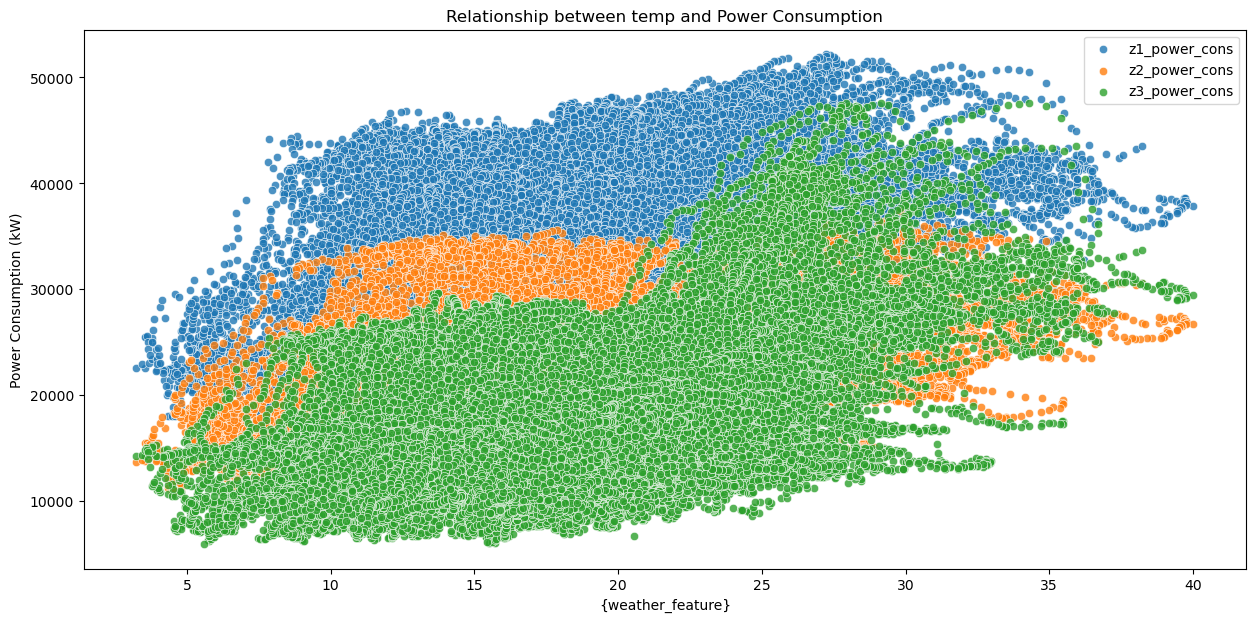

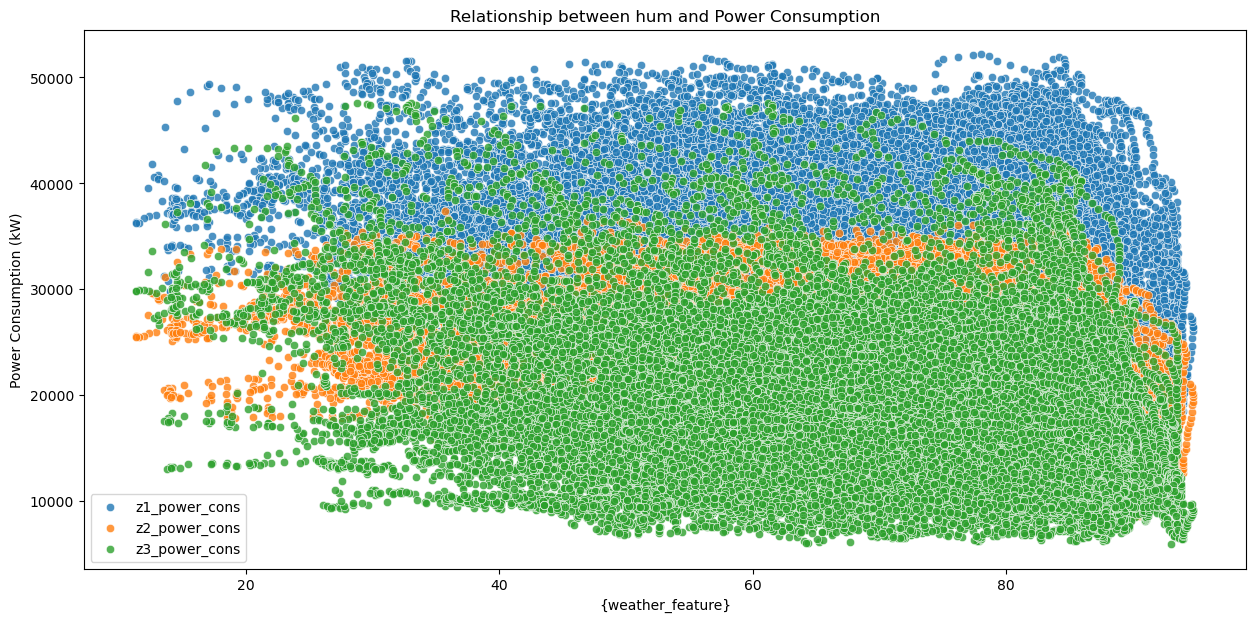

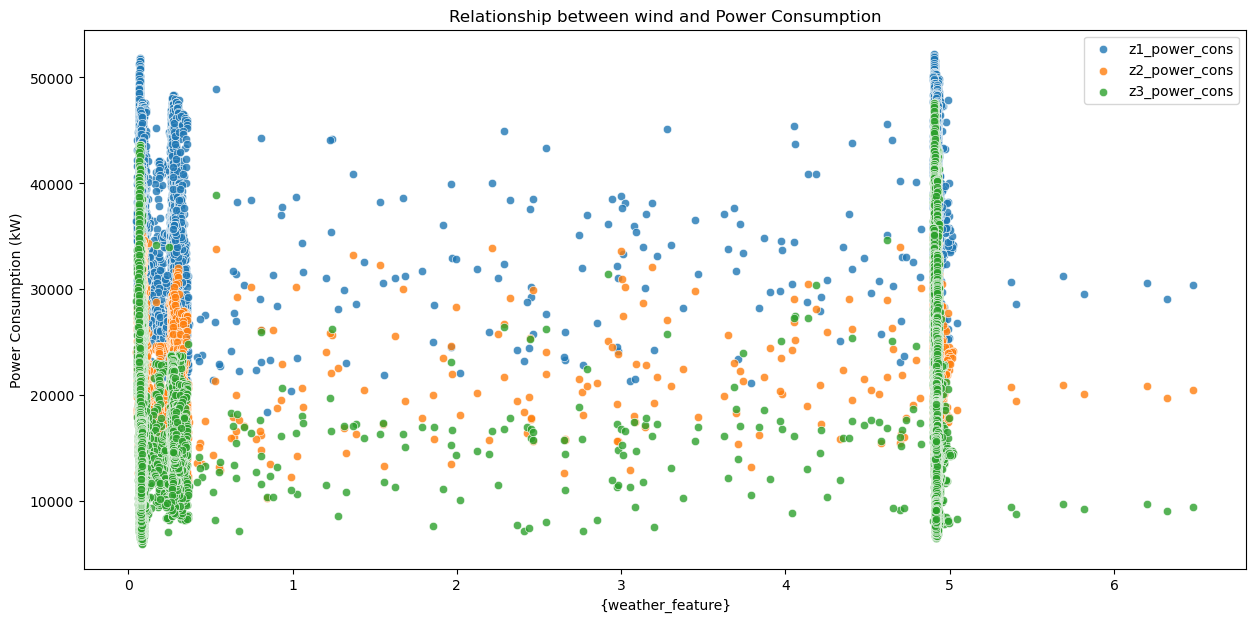

In [ ]:
for weather_feature in ['temp','hum','wind']:

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:

        sns.scatterplot(x=weather_feature, y=zone, data=df, label=zone, alpha=0.8)
    
    plt.title(f"Relationship between {weather_feature} and Power Consumption")
    plt.xlabel(weather_feature)
    plt.ylabel("Power Consumption (kW)")
    plt.legend()
    plt.show()

By looking at the scatter plots, the relationship doesn´t seem clear, only for temperature seem to be some positive correlation, lets try to get more clarity by using the mean values

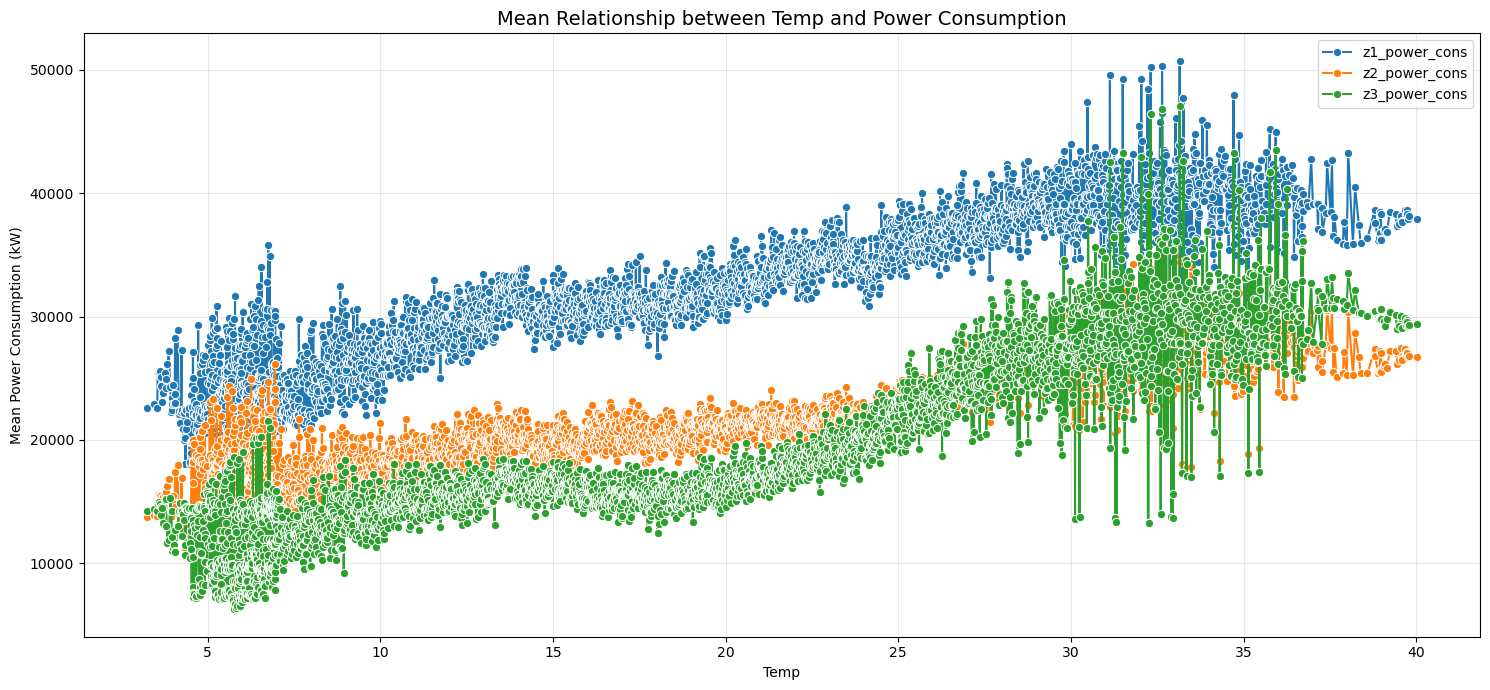

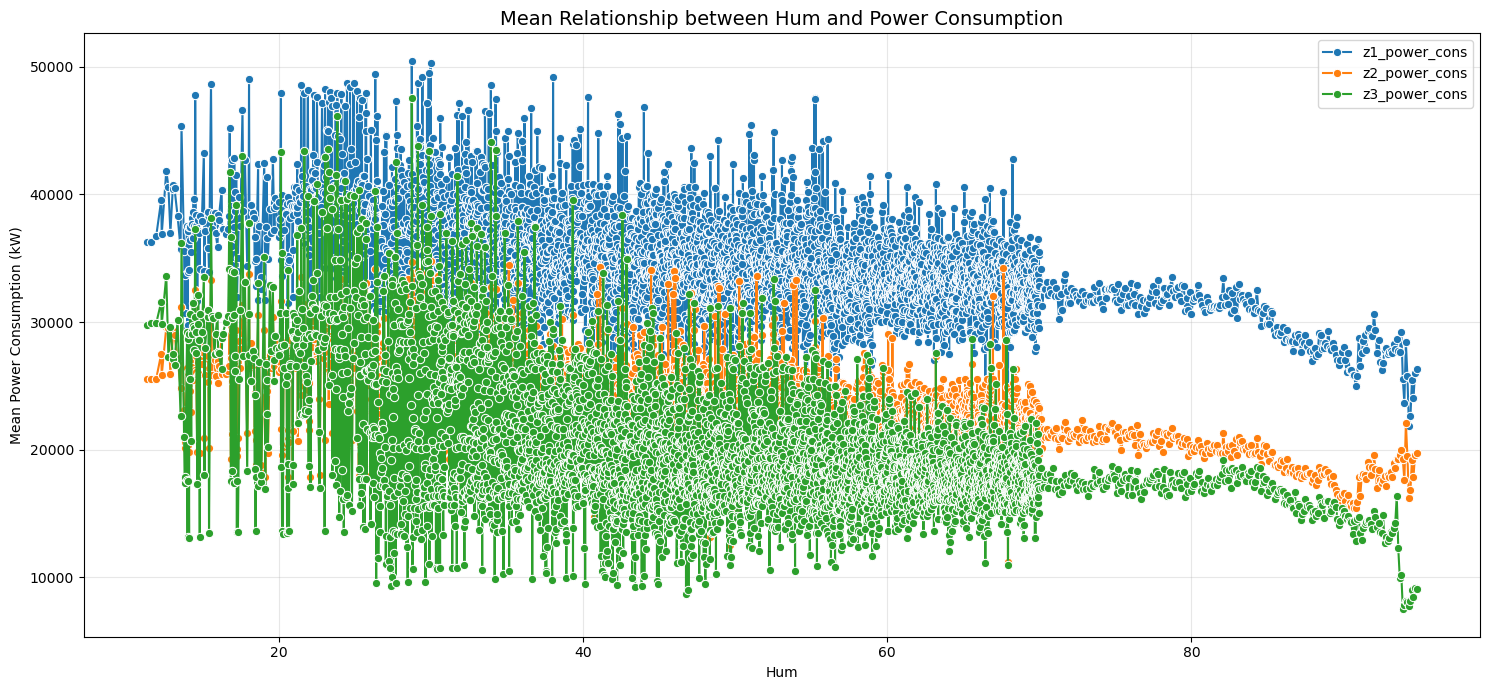

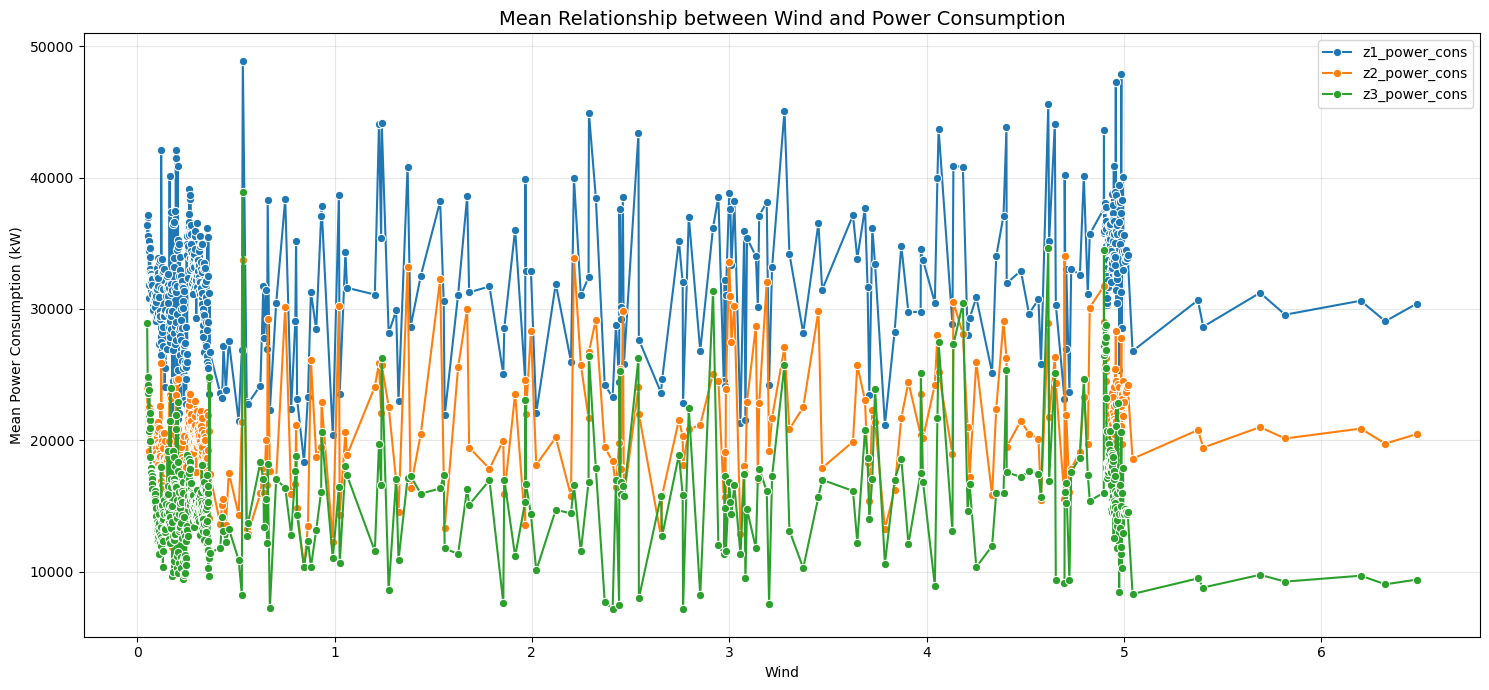

In [ ]:
for weather_feature in ['temp', 'hum', 'wind']:

    mean_df = df.groupby(weather_feature)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:
        sns.lineplot(x=weather_feature, y=zone, data=mean_df, label=zone, marker='o')

    plt.title(f"Mean Relationship between {weather_feature} and Power Consumption", fontsize=14)
    plt.xlabel(weather_feature)
    plt.ylabel("Mean Power Consumption (kW)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

We can see more clearly the relationshi with temp, but still looks a bit messy, we will bin the data to look more clean. 

C:\Users\Luis\AppData\Local\Temp\ipykernel_20148\4212671010.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = df.groupby(bin)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()


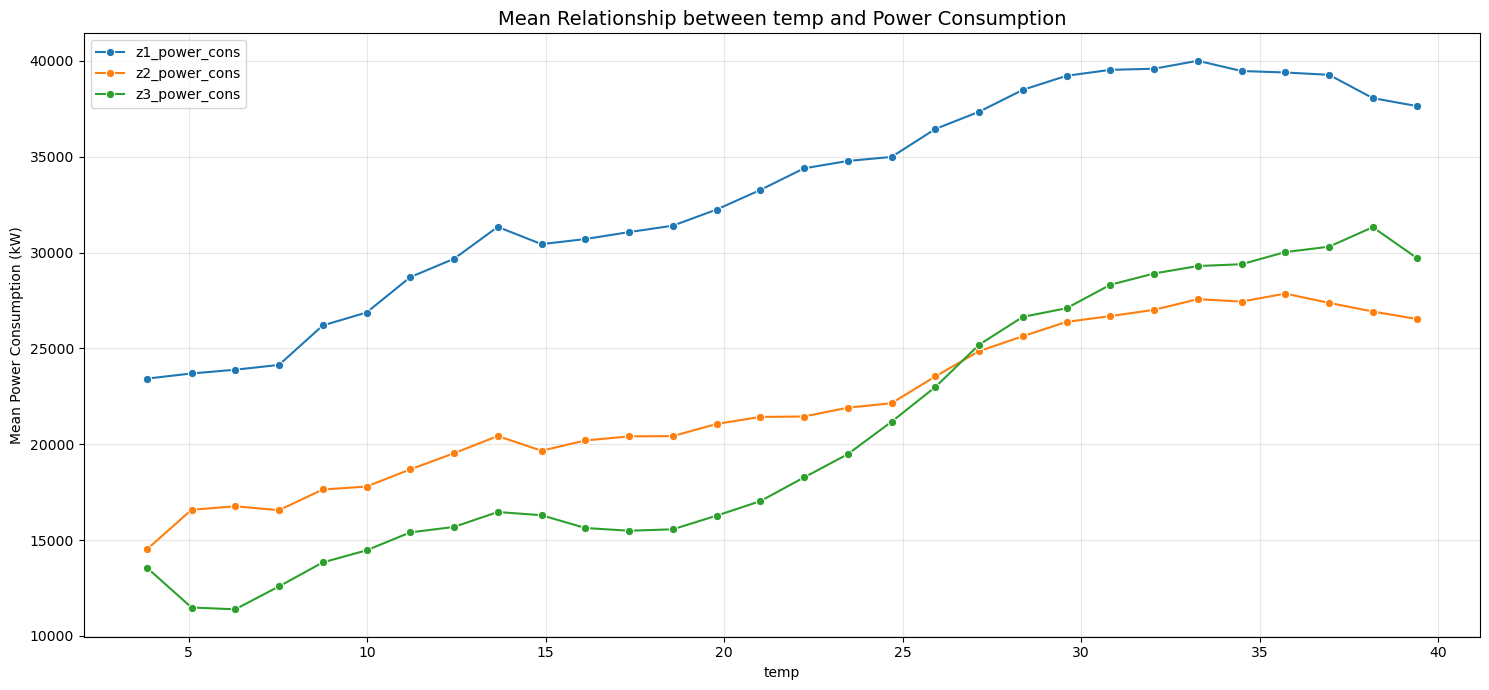

C:\Users\Luis\AppData\Local\Temp\ipykernel_20148\4212671010.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = df.groupby(bin)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()


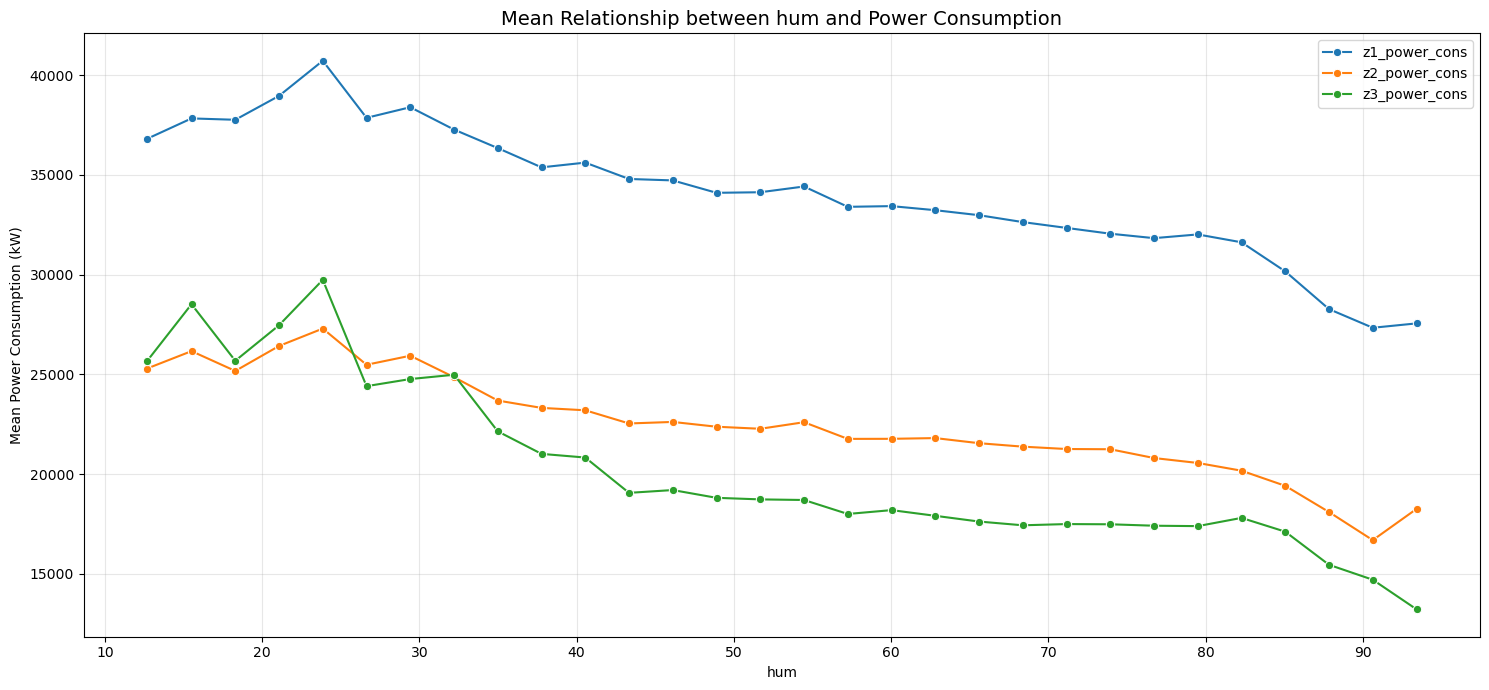

C:\Users\Luis\AppData\Local\Temp\ipykernel_20148\4212671010.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = df.groupby(bin)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()


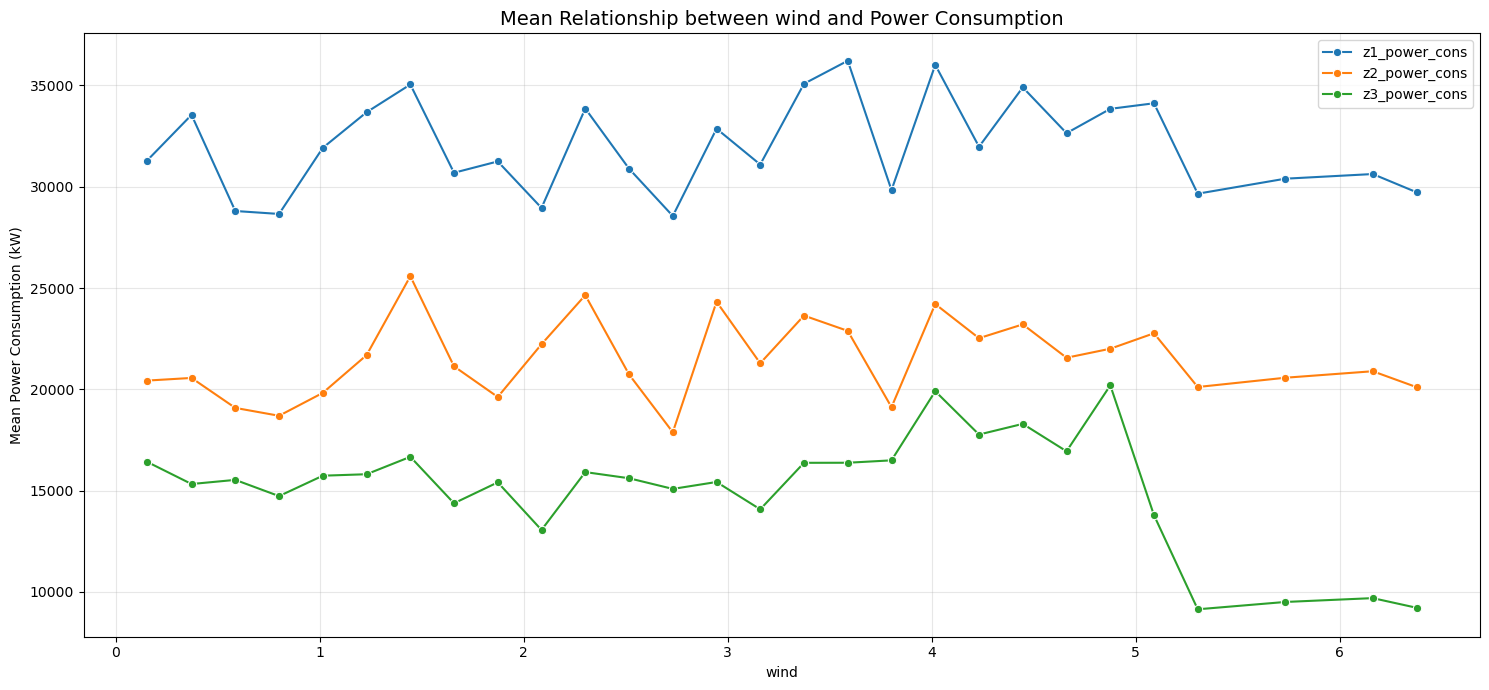

In [ ]:
for weather_feature in ['temp', 'hum', 'wind']:

    bin = weather_feature + '_bin'

    df[bin] = pd.cut(df[weather_feature], bins=30)
    mean_df = df.groupby(bin)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()
    mean_df[bin] = mean_df[bin].apply(lambda x: x.mid)

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:
        sns.lineplot(x=bin, y=zone, data=mean_df, label=zone, marker='o')

    plt.title(f"Mean Relationship between {weather_feature} and Power Consumption", fontsize=14)
    plt.xlabel(weather_feature)
    plt.ylabel("Mean Power Consumption (kW)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

We can now see more clearly how more temp meand more consumption generally, and now we can see a slight inverse relationship with humidity, and no really a clear relationship with Wind, expect that when the wind is high the consumption tends to go down. 

Now we will alanyze time variables to look for seasonal effects

In [ ]:
df.drop(columns=(['temp_bin','wind_bin','hum_bin']), inplace=True)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['month'] = df.index.month
df['day'] = df.index.day

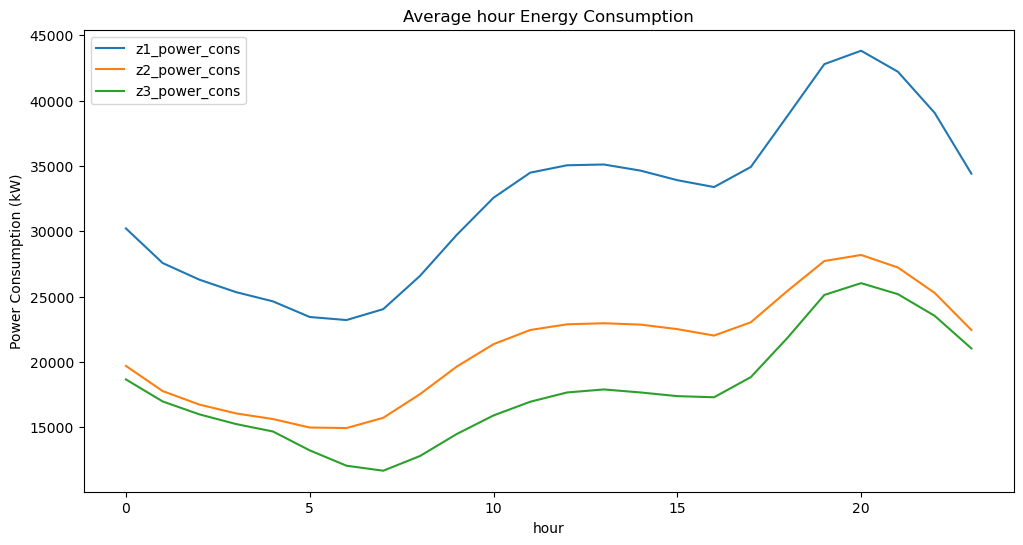

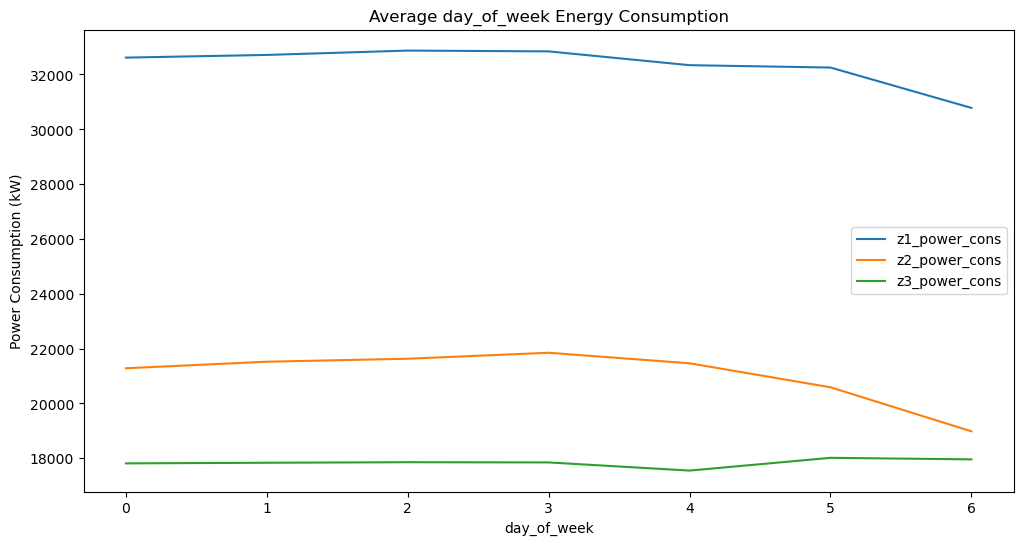

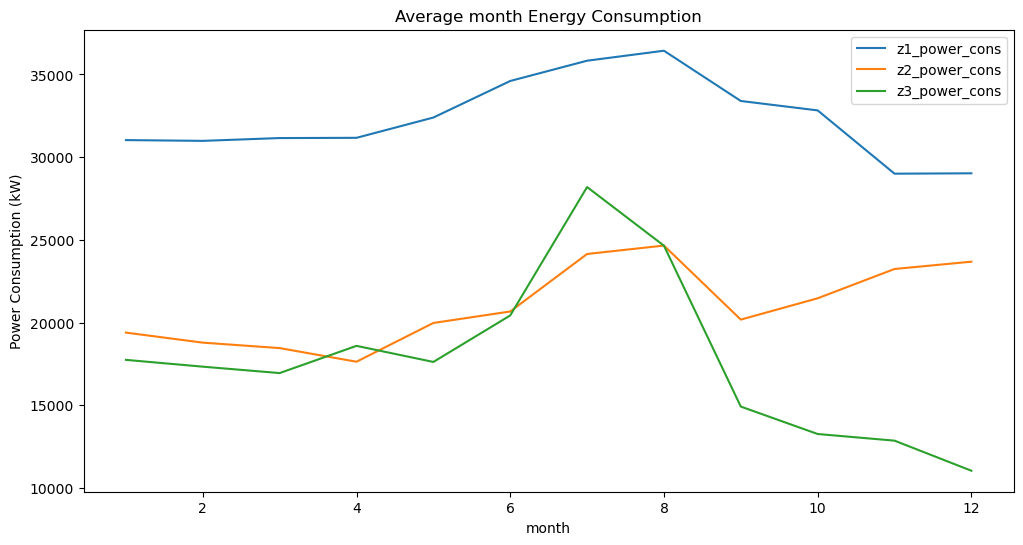

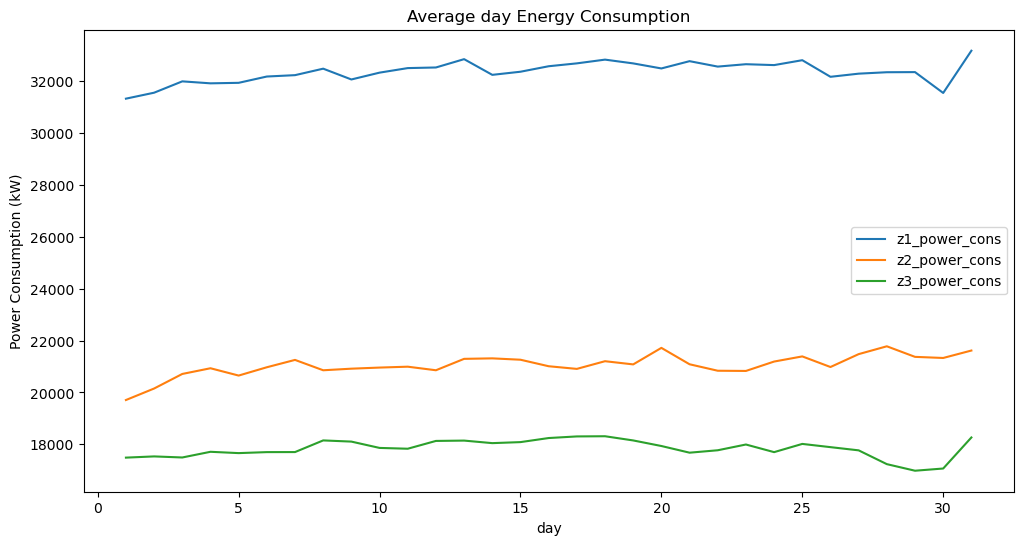

In [76]:
for time_lvl in ['hour','day_of_week','month','day']:

    grouped = df.groupby(time_lvl)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean()

    grouped.plot(figsize=(12,6))
    plt.title(f"Average {time_lvl} Energy Consumption")
    plt.ylabel("Power Consumption (kW)")
    plt.xlabel(time_lvl)
    plt.show()

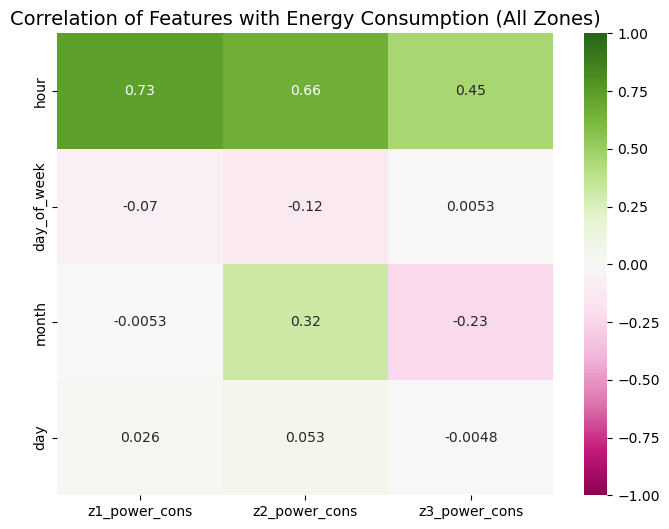

In [ ]:
# Filter per zone

corr = df.corr()

features = ['hour','day_of_week','month','day']
zone_corr = corr.loc[features, ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']]

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(zone_corr, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Correlation of Time Features with Energy Consumption (All Zones)", fontsize=14)
plt.show()

We can see a good correlation with hour and month, only zone 1 has no strong correlation with month, also zone two has some good correlation with day of week. The only time feature that seems to not add much is day, so we will drop it.

But now let see if hour feature is related because of temperature

<Axes: >

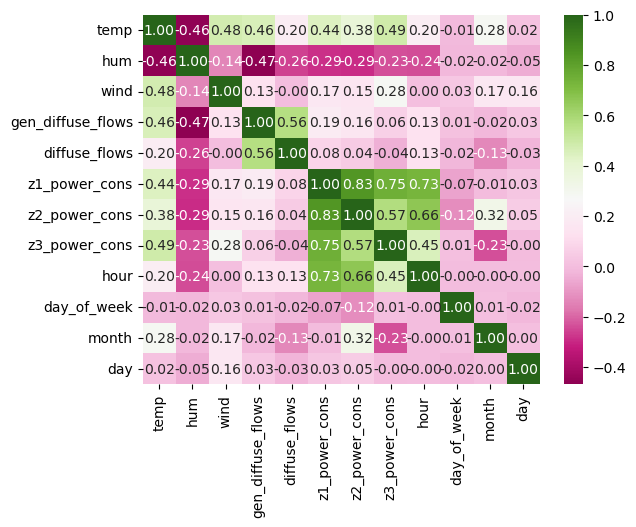

In [83]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG", cbar=True)

They don´t seem to have a big correlation, but this is linear, lets visualize a plot

<Axes: xlabel='hour', ylabel='temp'>

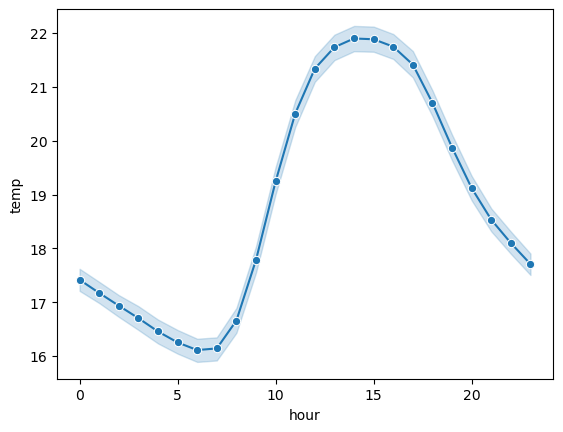

In [90]:
sns.lineplot(x='hour', y='temp', data=df, marker='o')

They seem to behave pretty similar, but still hour can help for the forecast since we want a very granular forecast, lets visualize these time variables behaviours 

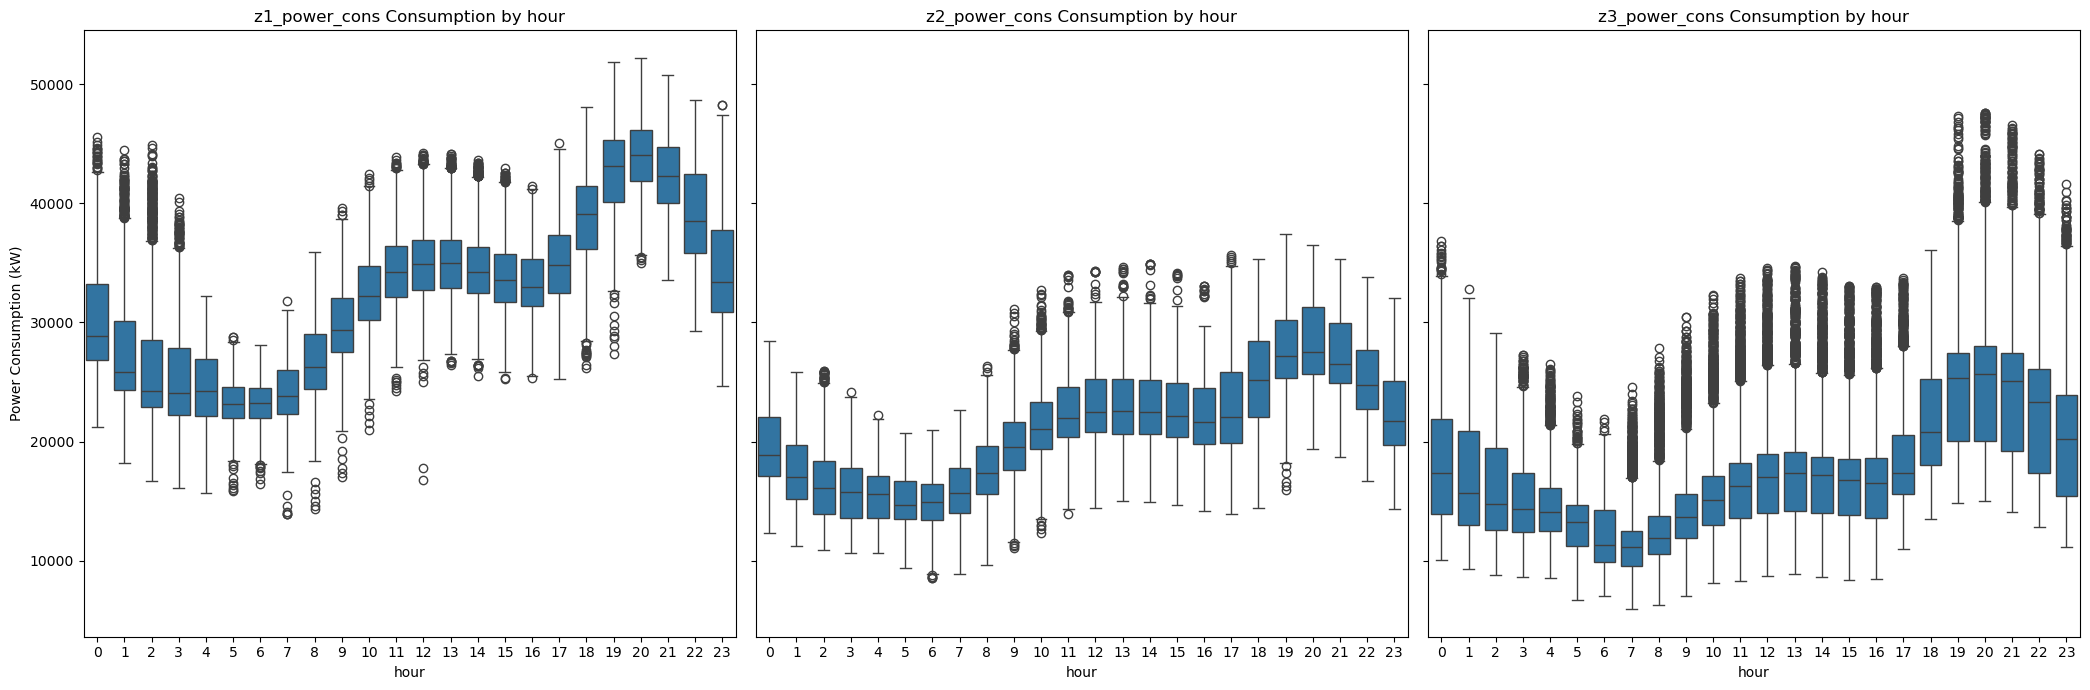

In [56]:
feature = 'hour'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x='hour', y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

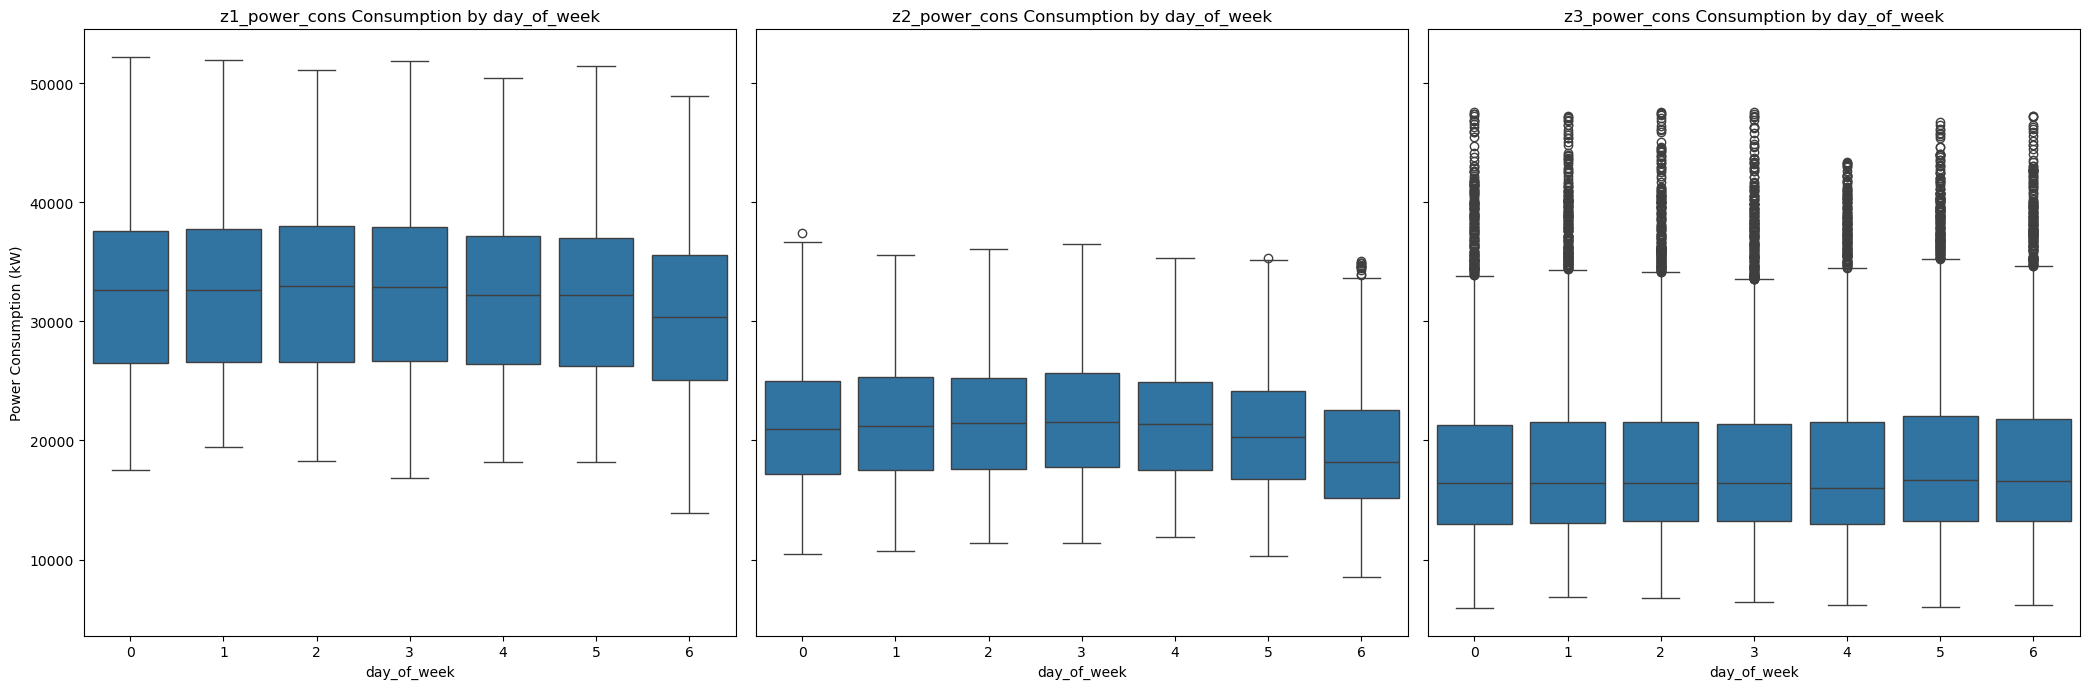

In [58]:
feature = 'day_of_week'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x=feature, y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

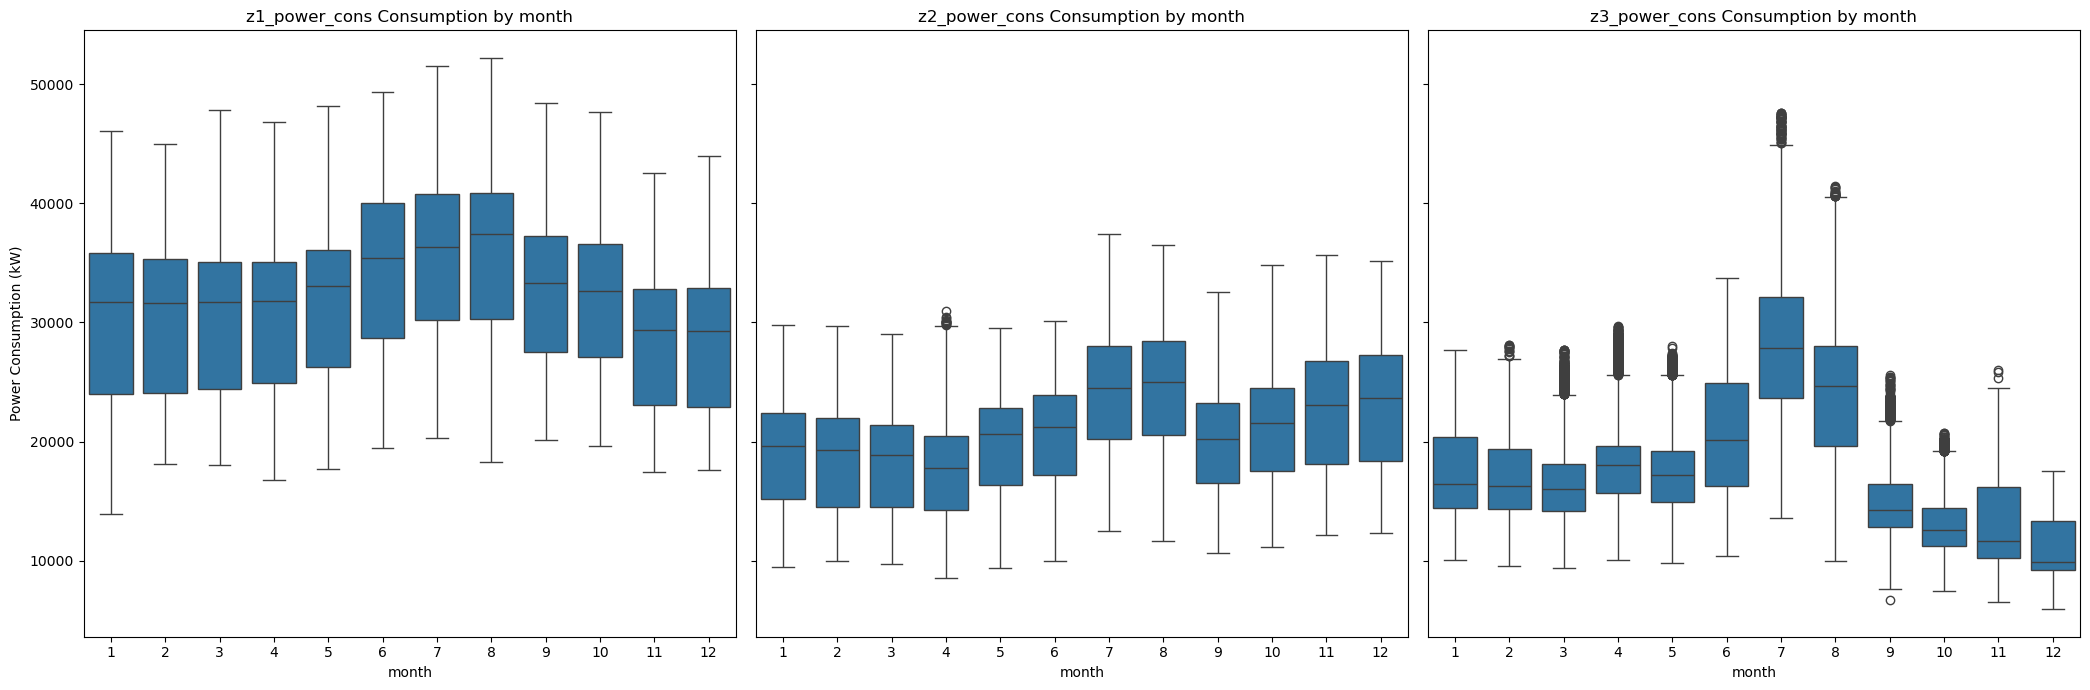

In [60]:
feature = 'month'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x=feature, y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

It seems to be the case that Hour and Month could be important features